In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

1. Web Scrapping

In [2]:
url_0 = "https://news.google.com/search?q="
keyword = input("Enter the keyword to search: ")
url_1 = "&hl=en-US&gl=US&ceid=US%3Aen"
url = url_0 + str(keyword) + url_1
print(url)

https://news.google.com/search?q=Inflation&hl=en-US&gl=US&ceid=US%3Aen


In [3]:
page = requests.get(url)

soup = BeautifulSoup(page.content, "html.parser")

# Extract articles
articles = soup.find_all("article")

# Extract headlines
headlines = []
for article in articles:
    headline = article.find("a", class_="DY5T1d")
    if headline:
        headlines.append(headline.text)

In [4]:
# Print the first 10 headlines
headlines[:5]

['Euro zone inflation ticks up in April',
 'Japan Inflation Seen Pushing BOJ to Consider Higher Forecasts',
 'Inflation rate unexpectedly increased in April, jumping up to 4.4%',
 'Inflation climbs to 4.4% in April, beating expectations',
 'USD/CAD Slips as Hot Canadian Inflation Raises Risks of More BoC Hikes']

2. Word Frequency Data Frame

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

processed_headlines = [re.sub('[^a-zA-Z]', ' ', headline) for headline in headlines]
processed_headlines = [re.sub(r'\s+', ' ', headline) for headline in processed_headlines]
processed_headlines = [headline.lower() for headline in processed_headlines]

In [6]:
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)

In [9]:
# remove stopwords from headlines
processed_headlines = [[word for word in headline.split() if word not in stopwords] for headline in processed_headlines]

In [10]:
# create a term document matrix and convert it to a pandas dataframe
vectorizer = CountVectorizer(analyzer='word')
term_matrix = vectorizer.fit_transform([' '.join(headline) for headline in processed_headlines])
terms = vectorizer.get_feature_names()
word_counts = np.array(term_matrix.sum(axis=0))[0]
df_words = pd.DataFrame({'word': terms, 'freq': word_counts})
df_words = df_words.sort_values('freq', ascending=False)

c:\Users\Popperkim\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [11]:
df_words.head()

,word,freq
204,inflation,100
352,says,13
320,rate,9
304,prices,9
22,bank,9


3. Make Word Cloud Picture

In [12]:
text = ' '.join(headlines)

In [13]:
# Create the wordcloud object
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(text)

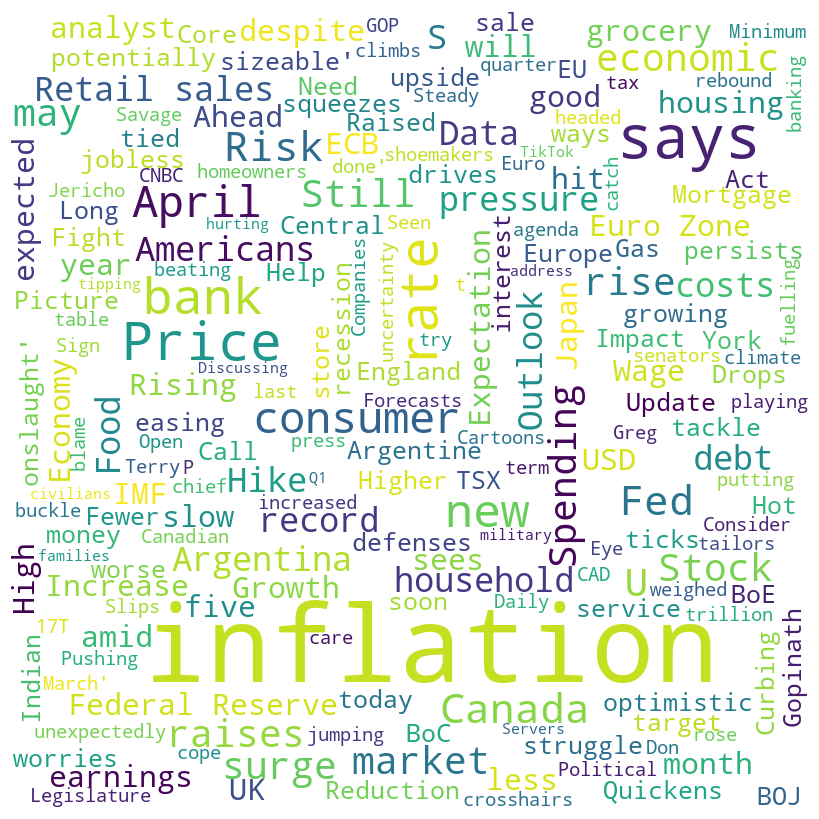

In [14]:
# Plot the wordcloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()